In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sms
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
import statsmodels.api as smf

In [122]:
data = pd.read_csv(r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\4. Simple Linear Regression\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing EDA 

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [124]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [125]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [126]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [127]:
data[data.duplicated()].shape

(0, 2)

# check for Outliers

Text(0.5, 1.0, 'Sorting Time')

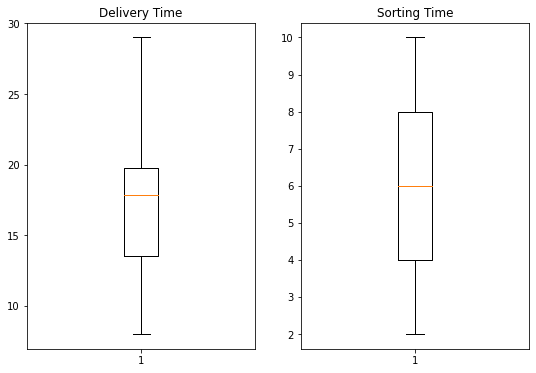

In [128]:
plt.subplots(figsize = (9,6))

plt.subplot(121)
plt.boxplot(data['Delivery Time'])
plt.title('Delivery Time')

plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
# no Outliers

# Correlation

In [129]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

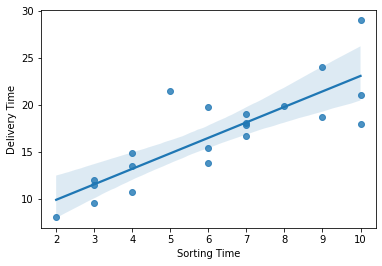

In [130]:
# visualization relation between x and y
sns.regplot(x = 'Sorting Time', y = 'Delivery Time', data = data)

# Feature engineering

Text(0.5, 1.0, 'before transformation')

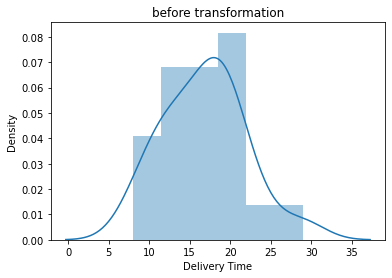

In [131]:
sns.distplot(data['Delivery Time'], bins = 6, kde = True)
plt.title('before transformation')

Text(0.5, 1.0, 'after transformation')

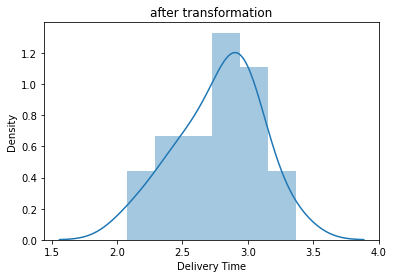

In [132]:
sns.distplot(np.log(data['Delivery Time']), bins = 6, kde = True)
plt.title("after transformation")

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

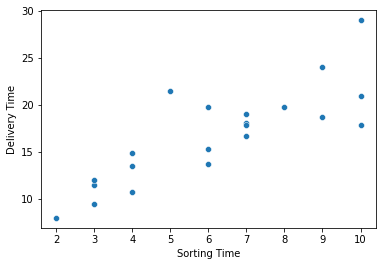

In [133]:
sns.scatterplot(x = data['Sorting Time'], y = data['Delivery Time'])

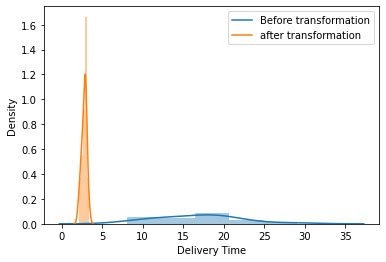

In [134]:
sns.distplot(data['Delivery Time'])
sns.distplot(np.log(data['Delivery Time']))
plt.legend(['Before transformation', 'after transformation'])
plt.show()

Text(0.5, 1.0, 'cuberoot Transformation')

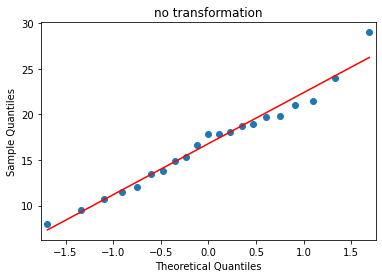

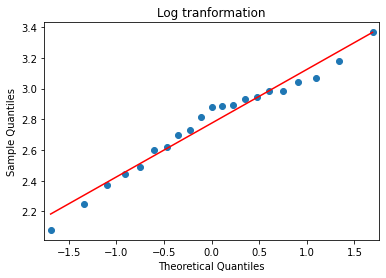

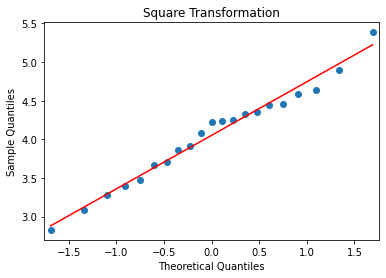

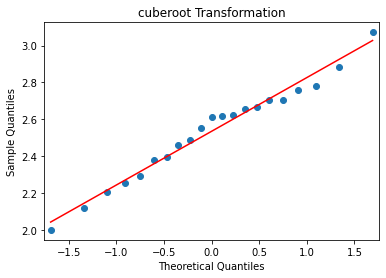

In [135]:
smf.qqplot(data['Delivery Time'], line = 'r')
plt.title('no transformation')

smf.qqplot(np.log(data['Delivery Time']), line = 'r')
plt.title('Log tranformation')

smf.qqplot(np.sqrt(data['Delivery Time']), line = 'r')
plt.title('Square Transformation')

smf.qqplot(np.cbrt(data['Delivery Time']), line = 'r')
plt.title('cuberoot Transformation')


<function matplotlib.pyplot.show(close=None, block=None)>

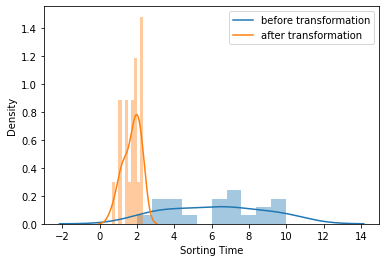

In [136]:
sns.distplot(data['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(data['Sorting Time']), bins = 10, kde = True)

plt.legend(['before transformation', 'after transformation'])
plt.show

Text(0.5, 1.0, 'cuberoot transformation')

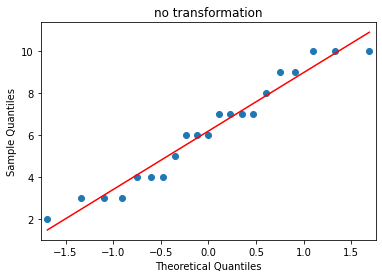

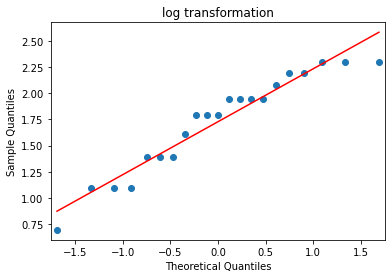

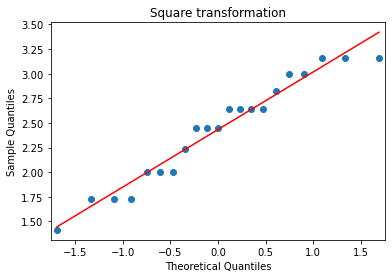

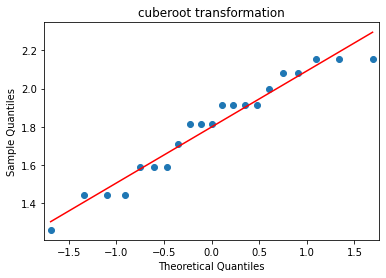

In [137]:
smf.qqplot(data['Sorting Time'], line = 'r')
plt.title("no transformation")

smf.qqplot(np.log(data['Sorting Time']), line = 'r')
plt.title("log transformation")

smf.qqplot(np.sqrt(data['Sorting Time']), line = 'r')
plt.title("Square transformation")

smf.qqplot(np.cbrt(data['Sorting Time']), line = 'r')
plt.title("cuberoot transformation")

# Fitting Linear regression model


In [138]:
data = data.rename({"Delivery Time":"dt", "Sorting Time":"st"},axis = 1)

In [139]:
model1 = sms.ols('dt~st', data = data).fit()
model1

In [140]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        14:43:07   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
model2 = sms.ols('np.log(dt)~np.log(st)', data = data).fit()
model2

In [142]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.60e-07
Time:                        14:43:07   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(st)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
model3 = sms.ols('np.sqrt(dt)~np.sqrt(st)', data = data).fit()
model3

In [144]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(dt)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           8.48e-07
Time:                        14:43:07   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(st)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
model4 = sms.ols('np.cbrt(dt)~np.cbrt(st)', data = data).fit()
model4

In [146]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.cbrt(dt)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.90e-07
Time:                        14:43:08   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(st)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
#best model is model2 with r^2 = 0.77

In [148]:
model2.params

Intercept     1.741987
np.log(st)    0.597522
dtype: float64

# New data points

In [149]:
df = pd.Series([4,6,9])
data_pred = pd.DataFrame(df, columns = ['st'])
data_pred

,st
0,4
1,6
2,9


In [150]:
p = model2.predict(data_pred)

In [151]:
np.exp(p)

0    13.070123
1    16.653216
2    21.218593
dtype: float64

# Comparing actuall values and predicted values

In [152]:
prediction1 = pd.DataFrame()
prediction1['Sorting time'] = data['st']
prediction1['Delivery time'] = data.dt
prediction1['predicted delivery time'] = np.exp(model2.predict(data.st))

In [153]:
prediction1

,Sorting time,Delivery time,predicted delivery time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


# Set2

In [156]:
data = pd.read_csv(r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\4. Simple Linear Regression\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# Performing EDA

In [113]:
#checking for no of rows, coulmns and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [117]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [118]:
# Duplicate values
data[data.duplicated()]

,YearsExperience,Salary


In [116]:
data[data.duplicated()].shape

(0, 2)

# Checking Outliers

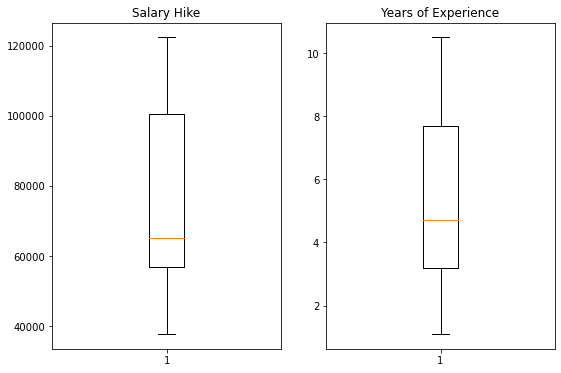

In [111]:
#boxplot visualization for outliers
plt.subplots(figsize = (9,6))

plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary Hike')

plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Years of Experience')

plt.show()

# Correlation between variables

In [158]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

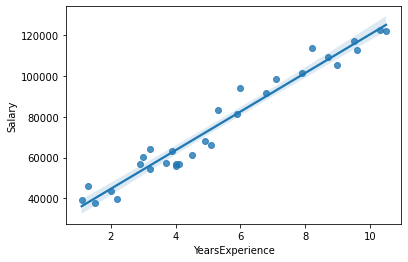

In [159]:
# Correlation beteen x and y

sns.regplot(x=data['YearsExperience'],y=data['Salary']) 

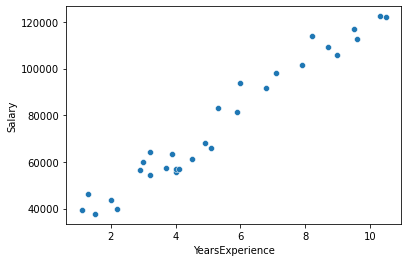

In [160]:
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])

plt.show()

# feature engineering

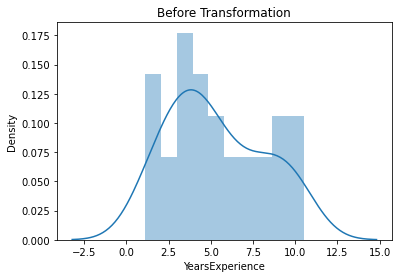

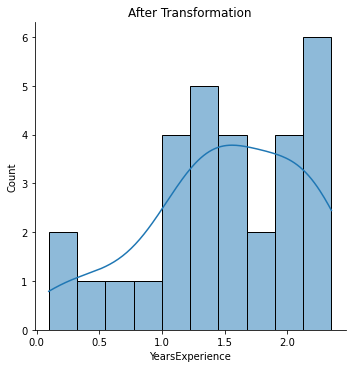

In [161]:
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')

sns.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

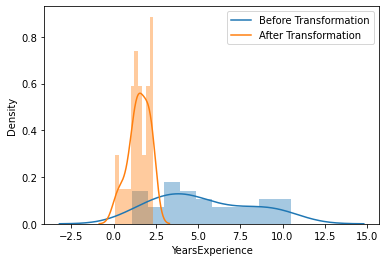

In [162]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

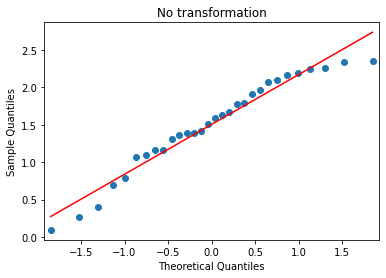

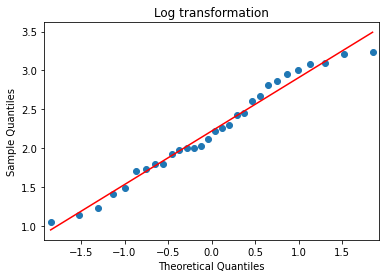

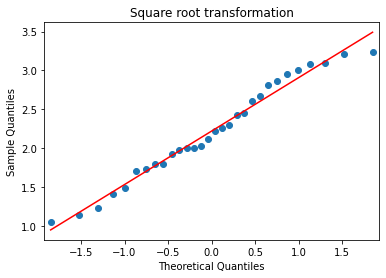

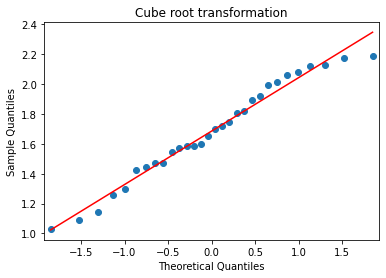

In [163]:
smf.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('No transformation')

smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')

smf.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')

plt.show()

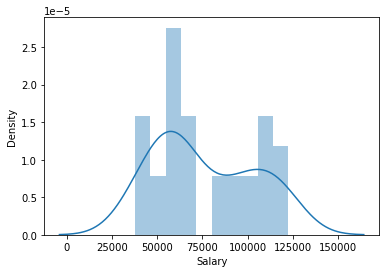

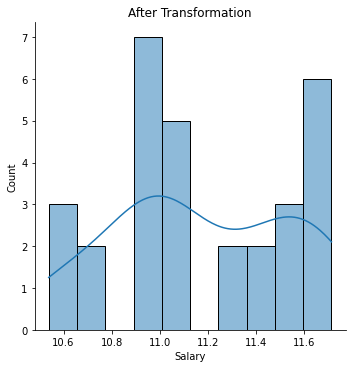

In [164]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.displot(np.log(data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

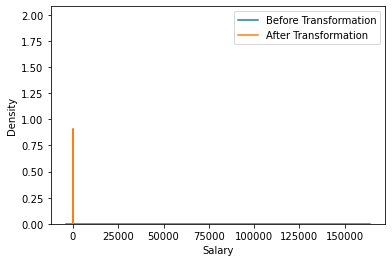

In [165]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.distplot(np.log(data['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

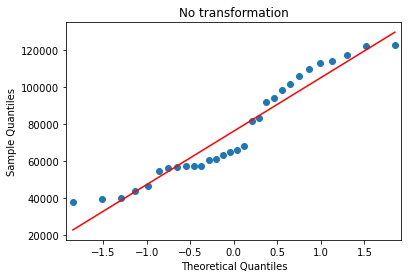

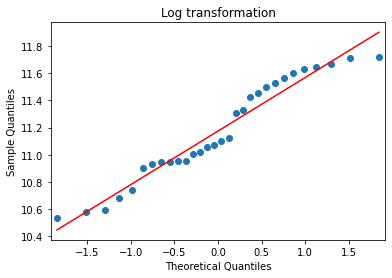

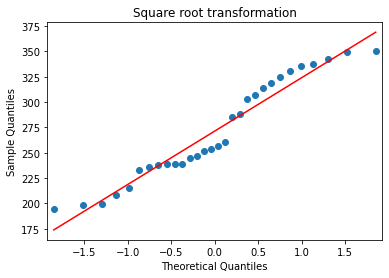

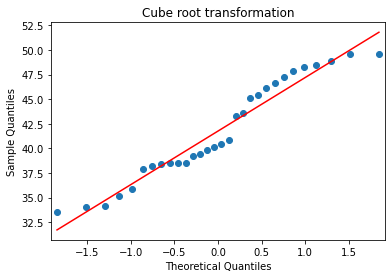

In [166]:
smf.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')

smf.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')

smf.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')

plt.show()

# Fitting a Linear Regression Model

In [168]:
# Using Ordinary least square method (OLS) regression

import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = data).fit()

In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        14:50:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# Square Root transformation on data

model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           7.58e-19
Time:                        14:52:21   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
#Cuberoot transformation on Data

model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           6.37e-18
Time:                        14:52:42   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
# Log Transformation on Data

model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           7.40e-16
Time:                        14:53:09   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
# model1 is best fit model with R- squared value - 0.957
# coefficients 
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [177]:
# t-value & p-value
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [178]:
#R-Squared values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Predict new data Point

In [183]:
# Predict for 3.7 and 5.3 

newdata=pd.Series([3.7,5.3])

In [185]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3.7
1,5.3


In [186]:
model.predict(data_pred)

0    60757.060788
1    75877.000502
dtype: float64

# Comparing actuall values and predicted values

In [187]:
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = data.YearsExperience
predicted2['Salary'] = data.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted2.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306
5,2.9,56642,53197.090931
6,3.0,60150,54142.087163
7,3.2,54445,56032.079627
8,3.2,64445,56032.079627
9,3.7,57189,60757.060788
